In [1]:
import os
import cmath
import numpy as np
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
from lmfit import  Model
%matplotlib inline

In [2]:
Path = '/Users/cgoldsmith/Desktop/text_files_data'
    # os.chdir(Path)
omega_dip=np.zeros(2000)
i=0
with open(Path+'/omega4dip.txt') as infile:
    for line in infile:
        omega_dip[i]=(line.split()[0])
        i=i+1

dip_1=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha1_3fs.txt') as infile:
    for line in infile:
        dip_1[i]=(line.split()[0])
        i=i+1    

dip_3=np.zeros(np.size(omega_dip))
i=0
with open(Path + '/alpha3_3fs.txt') as infile:
    for line in infile:
        dip_3[i]=(line.split()[0])
        i = i + 1

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 256
    # data points      = 2000
    # variables        = 3
    chi-square         = 21445.114
    reduced chi-square = 10.739
    Akaike info crit   = 4750.699
    Bayesian info crit = 4767.502
[[Variables]]
    amp:   1.45142915 +/- 0.081339 (5.60%) (init= 5)
    cen:   1.09130795 +/- 0.011228 (1.03%) (init= 5)
    wid:   0.17087249 +/- 0.010724 (6.28%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(amp, wid)                  =  0.549 
    C(amp, cen)                  =  0.214 
    C(cen, wid)                  =  0.198 



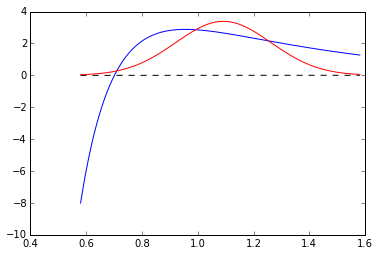

In [5]:
def gaussian(x, amp, cen, wid):
    "1-d gaussian: gaussian(x, amp, cen, wid)"
    return (amp/(np.sqrt(2*np.pi)*wid)) * np.exp(-(x-cen)**2 /(2*wid**2))

gmod = Model(gaussian)
result = gmod.fit(dip_1, x=omega_dip, amp=5, cen=5, wid=1)

print(result.fit_report())
x = omega_dip
y = dip_1
plt.plot(x, y,         'b-')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')